In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import numpy as np
# import plotly.graph_objs as go
# import plotly.tools as tls
pd.options.plotting.backend = "matplotlib"




In [64]:
def deriv(state, t, N, beta, gamma):
    S,I,R = state
    #change in S population over time
    dSdt = -beta*S*I/N
    #change in I population over time
    dIdt = beta*S*I/N-gamma*I
    #change in R population over time
    dRdt = gamma*I
    
    return dSdt,dIdt,dRdt


#sample usage
effectiveContactRate = 0.5*5
recoveryRate = 1/4
R0 = effectiveContactRate/recoveryRate
print("R0 is {}".format(R0))

totalPopulation = 1000
recovered = 0
infected = 1
susceptible = totalPopulation - recovered - infected

days = range(1, 160)

ret = odeint(deriv, [ susceptible, infected, recovered ], days, args = ( totalPopulation, effectiveContactRate, recoveryRate ) )

S, I, R = ret.T #spews out list of S,I and R people on each of the days from 1 to 160 

df = pd.DataFrame({ 'susceptible':S , 'infected':I , 'recovered':R , 'day':days})


R0 is 10.0


fig = df.plot()
fig.show()


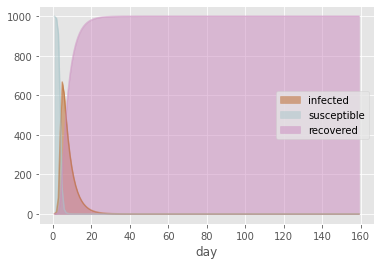

In [72]:
plot = df.plot(x='day',
                      y=['infected', 'susceptible', 'recovered'],
                      color=['#bb6424', '#aac6ca', '#cc8ac0'],
                      kind='area',
                      stacked=False
                      )
# figure = []
# figure.append(dict(data = graph))


In [71]:
fig = plot.get_figure()
fig.savefig('D:\CodingProjects\disease_spreadlifecycle/samplemodel.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>